In [1]:
from math import exp
import numpy as np

class LogisticRegression():
    def __init__(self, max_iter, n_variables, X, y, learning_rate = None, tolerance = None):
        super().__init__()
        self.max_iter = max_iter
        #We add 1 to the number of variables so we compute the bias term too.
        self.n_variables = n_variables + 1
        self.y = y
        #We add a 1 on every array to compute theta_0
        self.X = [] 
        for x in X:
            self.X.append(np.append(np.array([1]),x))
        self.X = np.array(self.X)
        self.theta = np.zeros(self.n_variables)
        if learning_rate is None:
            self.eta = 0.01
        else:
            self.eta = learning_rate
        if tolerance is None:
            self.tol = 0.6
        else:
            self.tol = tolerance
        
    def sigma(self, t):
        return 1/(1+exp(-t))
    
    def CostFunction(self):
        cost = 0
        for k in range(len(self.X)):
            cost += (self.y[k]*np.log(self.sigma(np.dot(self.theta, self.X[k])))) + ((1-self.y[k])*np.log(1-self.sigma(np.dot(self.theta, self.X[k]))))
        return - cost/len(self.X)
    
    #Derivative of logit cost function as expressed on page 139 of Hands-On Machine Learning
    #with Scikit-Learn & TensorFlow by Aurélien Géron
    
    def DerCostFunction(self):
        partial_theta = []
        for i in range(self.n_variables):
            valor = 0
            for j in range(len(self.X)):
                valor += (self.sigma(np.dot(self.X[j], self.theta)) - self.y[j])*self.X[j][i]
            partial_theta.append(valor * (1/len(self.X)))
        #print("Der theta:", partial_theta)
        return np.array(partial_theta)        
    
    def fit(self, eta = 0.01):
        #We use Gradient Descent to compute the theta's.
        contador = 0
        while True:
            if contador >= 8:
                theta_aux = self.theta
            else:
                theta_aux = np.ones(self.n_variables)
                
            self.theta = self.theta - self.eta * self.DerCostFunction()
            contador += 1
            convergence = (self.CostFunction() <= self.tol).astype(np.int)
            if (contador >= self.max_iter or convergence == 1):
                if convergence != 1:
                    print(self.CostFunction())
                    raise ValueError("Convergence criterion wasn't met.")
                print("Number of steps completed: {:}".format(contador))
                break
        return self.theta
    
    def Predict(self, v):
        return sigma(self.theta[0] + np.dot(v, self.theta[1:]))
    
    def PredictAll(self):
        probabilities = []
        for i in range(len(self.X)):
            probabilities.append([self.y[i], self.sigma(np.dot(self.theta, self.X[i]))])
        return np.array(probabilities)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X_iris = iris.data
y_iris = (iris.target == 2).astype(np.int)

In [3]:
logit_iris = LogisticRegression(max_iter = 100, n_variables = 4, X = X_iris, y = y_iris, tolerance = 0.435, learning_rate = 0.02)

In [4]:
logit_iris.fit()

Number of steps completed: 98


array([-0.10679794, -0.25587601, -0.33018768,  0.4377337 ,  0.27088284])

In [5]:
probas = logit_iris.PredictAll()

In [6]:
#We evaluate the performance of the regression
import sklearn.metrics as metrics
preds = probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_iris, preds)
roc_auc = metrics.auc(fpr, tpr)

In [7]:
print("AUC: {:.4f}, Gini: {:.4f}".format(roc_auc, 2*roc_auc -1))

AUC: 0.9952, Gini: 0.9904


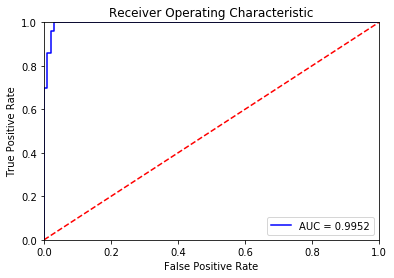

In [9]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_iris, preds)

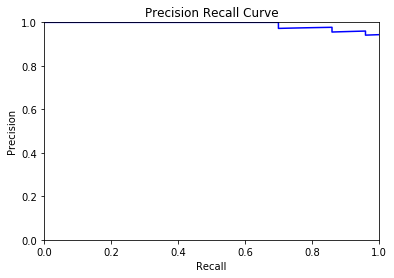

In [11]:
plt.title('Precision Recall Curve')
plt.plot(recalls, precisions, 'b')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression as LogReg

log_reg = LogReg(max_iter = 100)
log_reg.fit(X_iris, y_iris)

/Users/oriol/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#We evaluate the performance of the regression
import sklearn.metrics as metrics
preds_sk = log_reg.predict_proba(X_iris)[:,1]
fpr_sk, tpr_sk, threshold_sk = metrics.roc_curve(y_iris, preds_sk)
roc_auc_sk = metrics.auc(fpr_sk, tpr_sk)

In [14]:
print("AUC: {:.4f}, Gini: {:.4f}".format(roc_auc_sk, 2*roc_auc_sk -1))

AUC: 0.9974, Gini: 0.9948


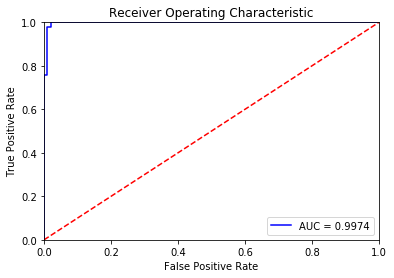

In [15]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_sk, tpr_sk, 'b', label = 'AUC = %0.4f' % roc_auc_sk)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

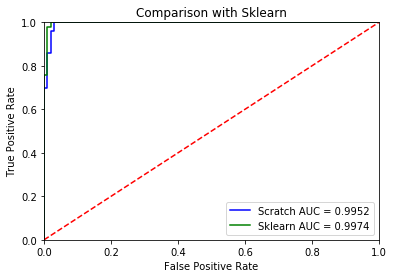

In [16]:
plt.title('Comparison with Sklearn')
plt.plot(fpr, tpr, 'b', label = 'Scratch AUC = %0.4f' % roc_auc)
plt.plot(fpr_sk, tpr_sk, 'g', label = 'Sklearn AUC = %0.4f' % roc_auc_sk)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()